### 1. 엑셀파일 읽고 쓰기

#### 1) 엑셀 파일의 데이터 읽기

In [1]:
import pandas as pd
df = pd.read_excel('c:/python/data/학생시험성적.xlsx')
df

,학생,국어,영어,수학,평균
0,A,80,90,85,85.000000
1,B,90,95,95,93.333333
2,C,95,70,75,80.000000
3,D,70,85,80,78.333333
4,E,75,90,85,83.333333


In [3]:
df2 = pd.read_excel("c:/python/data/학생시험성적.xlsx", index_col = '학생')
df2

,국어,영어,수학,평균
학생,,,,
A,80,90,85,85.000000
B,90,95,95,93.333333
C,95,70,75,80.000000
D,70,85,80,78.333333
E,75,90,85,83.333333


이렇게 index col을 열의 이름 혹은 index number로 지정해줄 수 있다.

sheet_name이라는 argument를 통해 시트를 지정해줄 수도 있음

In [5]:
df2 = pd.read_excel("c:/python/data/학생시험성적.xlsx", index_col = 0)
df2

,국어,영어,수학,평균
학생,,,,
A,80,90,85,85.000000
B,90,95,95,93.333333
C,95,70,75,80.000000
D,70,85,80,78.333333
E,75,90,85,83.333333


#### 2) 데이터를 엑셀 파일로 쓰기

1) pandas의 ExcelWriter 객체 생성

2) DataFrame 데이터를 지정된 엑셀 시트에 쓰기

3) ExcelWriter 객체를 닫고 지정된 엑셀 파일 생성 

의 과정으로 진행된다고 한다

In [14]:
import pandas as pd

excel_exam_data1 = {
    '학생' : ['a', 'b', 'c','d','e','f'], 
    '국어' : [80, 90, 95, 70, 75, 85],
    '영어' : [90, 95, 70, 85, 90, 95],
    '수학' : [85, 95, 75, 80, 85, 100]
}

df1 = pd.DataFrame(excel_exam_data1 
#                    , columns = ['학생', '국어','영어','수학']
                  )

df1

,학생,국어,영어,수학
0,a,80,90,85
1,b,90,95,95
2,c,95,70,75
3,d,70,85,80
4,e,75,90,85
5,f,85,95,100


In [17]:
excel_writer = pd.ExcelWriter('c:/python/data/학생시험성적2.xlsx', engine = 'xlsxwriter')
df1.to_excel(excel_writer, index = False) #index는 엑셀파일에 포함되지 않았다.
excel_writer.save()

In [19]:
#이번에는 시트의 이름을 지정해볼 수 있다.
excel_writer = pd.ExcelWriter('c:/python/data/학생시험성적3.xlsx', engine = 'xlsxwriter')
df1.to_excel(excel_writer, index = False, sheet_name = '중간고사') #index는 엑셀파일에 포함되지 않았다.
excel_writer.save()

### 2.엑셀 파일 통합

#### 1) 효율적인 데이터 처리를 위한 엑셀 데이터 구조

아래 사항을 지켜야 편한 데이터 처리가 가능하다고 한다

- 열의 머리글은 한 줄로만 만들고 데이터는 그 아래에 입력

- 열 머리글이나 데이터 입력 부분에 셀 병합 기능은 사용X

- 데이터를 입혁할 때 하나의 셀에 숫자와 단위를 같이 쓰지 않는다

- 하나의 열에 입력한 데이터의 형식은 모두 일치해야 한다

- 데이터를 연도, 분기, 월, 업체별, 제품별 등의 시트로 나누지 않는다

#### 2) 여러 개의 엑살 파일 데이터 통합

In [20]:
exc_datafiles = ['C:/python/data/담당자별_판매량_Andy사원.xlsx',
                'C:/python/data/담당자별_판매량_Becky사원.xlsx',
                'C:/python/data/담당자별_판매량_Chris사원.xlsx'
                ]

In [21]:
#통합할 데이터 셋 만들기
total_data = pd.DataFrame()

In [24]:
import pandas as pd

for f in exc_datafiles : 
    df = pd.read_excel(f)
    total_data = total_data.append(df, ignore_index = True) #index를 없애야 순차적으로 데이터를 집어넣을 수 있다.
    
total_data

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
3,시계,B,나,154,108,155,114
4,구두,B,나,200,223,213,202
5,핸드백,B,나,350,340,377,392
6,시계,C,다,168,102,149,174
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323
9,시계,A,가,198,123,120,137


- glob를 통해 파일명을 일일이 입력하지 않고 자동으로 파일명을 가져오기

이때 * 과 ?를 사용할 수 있다!

'*' : 길이와 상관없는 모든 문자열

'?' : 한 글자로 된 모든 문자열

In [26]:
import glob
glob.glob('c:/python/data/담당자별_판매량_*사원.xlsx') #모든 문자를 가져오게 된다. 

['c:/python/data\\담당자별_판매량_Andy사원.xlsx',
 'c:/python/data\\담당자별_판매량_Becky사원.xlsx',
 'c:/python/data\\담당자별_판매량_Chris사원.xlsx']

In [28]:
glob.glob('c:/python/data/담당자별_판매량_????사원.xlsx') #이렇게 네 글자로 하면 당연히 앤디만 뽑힌다!

['c:/python/data\\담당자별_판매량_Andy사원.xlsx']

In [29]:
import pandas as pd

#빈 데이터 만들기
total_data = pd.DataFrame()

#필요한 데이터 리스트 구축
excel_list = glob.glob('c:/python/data/담당자별_판매량_*사원.xlsx')

#for문 사용하여 데이터 합치기
for f in excel_list : 
    df = pd.read_excel(f)
    total_data = total_data.append(df)
                                   
total_data

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
0,시계,B,나,154,108,155,114
1,구두,B,나,200,223,213,202
2,핸드백,B,나,350,340,377,392
0,시계,C,다,168,102,149,174
1,구두,C,다,231,279,277,292
2,핸드백,C,다,365,383,308,323


#### 통합 결과를 엑셀 파일로 저장

In [31]:
import glob
import pandas as pd

excel_file_name = 'c:/python/data/담당자별_판매량_통합.xlsx'

# 1) 엑셀라이터
excel_total_writer = pd.ExcelWriter(excel_file_name, engine = 'xlsxwriter')

# 2) 파일을 쓰자
total_data.to_excel(excel_total_writer, index = False, sheet_name = '판매량통합')

# 3) 저장하자
excel_total_writer.save()

glob.glob(excel_file_name)


['c:/python/data/담당자별_판매량_통합.xlsx']

### 3.엑셀 데이터 핸들링

#### 1) 데이터 추가 및 변경

In [38]:
import pandas as pd

df = pd.read_excel('c:/python/data/담당자별_판매량_Andy사원.xlsx')
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331


In [39]:
#핸드백의 4분기 데이터를 0으로 변경.
df.loc[2,'4분기'] = 0
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,0


In [40]:
#행 추가도 가능한가?
new_row = ['가방', 'A', '가', 103, 211, 245, 62]

df.append(new_row)

df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,0


In [41]:
#열 추가도 가능한가?
new_col = ['andy1', 'andy2', 'andy3']

df['담당자2'] = new_col

df

,제품명,담당자,지역,1분기,2분기,3분기,4분기,담당자2
0,시계,A,가,198,123,120,137,andy1
1,구두,A,가,273,241,296,217,andy2
2,핸드백,A,가,385,316,355,0,andy3


#### 2) 여러 개의 엑셀 파일에서 데이터 수정

re 모듈의 sub() 함수를 사용한다!

substr과 비슷한 기능을 하는 듯

re.sub(pattern, repl, string) 

string에서 pattern을 찾아서 repl로 바꿔준다!

In [44]:
import re

file_name = 'c:/python/data/담당자별_판매량_Andy사원.xlsx'

new_file_name = re.sub(pattern = '.xlsx', repl = '2.xlsx', string = file_name)

new_file_name

'c:/python/data/담당자별_판매량_Andy사원2.xlsx'

In [45]:
#A B C로 돼 있던 담당자 이름을 Andy Becky Chris로 바꿔보자. 
import re
import glob
import pandas as pd

#전체 데이터를 call
excel_data_files = glob.glob('c:/python/data/담당자별_판매량_*사원.xlsx')


for f in excel_data_files : 
    df = pd.read_excel(f)
    
    #칼럼 바꾸기
    if df.loc[1,'담당자'] == 'A' : 
        df['담당자'] = 'Andy'
    elif df.loc[1,'담당자'] == 'B' : 
        df['담당자'] = 'Becky'
    else  : 
        df['담당자'] = 'Chris'
        
    #엑셀 파일 이름에서 파일명 변경
    f_new = re.sub(pattern = '.xlsx', repl = '2.xlsx', string = f)
    
    #엑셀 파일 저장
    excel_writer = pd.ExcelWriter(f_new, engine = 'xlsxwriter')
    df.to_excel(excel_writer, index = False)
    excel_writer.save()

#### 3) 필터기능 이용

In [46]:
import pandas as pd

df = pd.read_excel('c:/python/data/담당자별_판매량_통합.xlsx')
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
3,시계,B,나,154,108,155,114
4,구두,B,나,200,223,213,202
5,핸드백,B,나,350,340,377,392
6,시계,C,다,168,102,149,174
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323


In [47]:
#df에서 제품명 열만 추출
df['제품명']

0     시계
1     구두
2    핸드백
3     시계
4     구두
5    핸드백
6     시계
7     구두
8    핸드백
Name: 제품명, dtype: object

In [48]:
#핸드백 문자열이 있는지 체크
df['제품명'] == '핸드백'

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8     True
Name: 제품명, dtype: bool

In [49]:
#R과 비슷하게, 이렇게 원하는 데이터만 추출할 수 있다.
df[df['제품명'] =='핸드백']

,제품명,담당자,지역,1분기,2분기,3분기,4분기
2,핸드백,A,가,385,316,355,331
5,핸드백,B,나,350,340,377,392
8,핸드백,C,다,365,383,308,323


In [52]:
#isin 메서드 활용
df[df['제품명'].isin(['핸드백'])]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
2,핸드백,A,가,385,316,355,331
5,핸드백,B,나,350,340,377,392
8,핸드백,C,다,365,383,308,323


In [54]:
#isin 메서드는 series에서만 활용이 가능할까?
df[df.isin(['핸드백'])]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,핸드백,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,핸드백,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,핸드백,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
#in 메서드는 잘 사용하면 좋다
df[df['제품명'].isin(['핸드백', '구두'])]

#이렇게 핸드백과 구두만 뽑아낼 수 있다.

,제품명,담당자,지역,1분기,2분기,3분기,4분기
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
4,구두,B,나,200,223,213,202
5,핸드백,B,나,350,340,377,392
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323


#### 4) 조건에 맞는 행 추출

In [57]:
#3분기의 판매량이 250이상인 행 추출
df[df['3분기']  >= 250]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
5,핸드백,B,나,350,340,377,392
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323


In [59]:
#제품명이 핸드백이면서 3분기 판매량이 250이상인 행 추출
df[(df['제품명'] == '핸드백') & (df['3분기'] >= 250)]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
2,핸드백,A,가,385,316,355,331
5,핸드백,B,나,350,340,377,392
8,핸드백,C,다,365,383,308,323


#### 5) 조건에 맞는 열 추출

In [113]:
#특정 열만 선택하기(열 이름으로 선택)

import pandas as pd

df = pd.read_excel('c:/python/data/담당자별_판매량_Andy사원.xlsx')

df[['제품명', '1분기', '2분기','3분기','4분기']]

,제품명,1분기,2분기,3분기,4분기
0,시계,198,123,120,137
1,구두,273,241,296,217
2,핸드백,385,316,355,331


In [114]:
#특정 열만 선택하기(열 index로 선택)

df.iloc[:,[0,3,4,5,6]]

,제품명,1분기,2분기,3분기,4분기
0,시계,198,123,120,137
1,구두,273,241,296,217
2,핸드백,385,316,355,331


#### 6) 엑셀 데이터 계산

In [150]:
#핸드백 항목만 선택한 후 분기별 판매량을 이용해 지역별 연간 판매량을 구하고자 한다면?
#행 데이터 합 계산

import pandas as pd

df = pd.read_excel('c:/python/data/담당자별_판매량_통합.xlsx')

#핸드백만 추출
handbags = df[df['제품명'] == '핸드백']

#연간판매량 계산
handbags['연간판매량'] = handbags.sum(axis = 1)

#연간판매량을 오름차순으로 정렬
handbag_total = handbags.sort_values(by = '연간판매량', axis = 0, ascending = False)

handbag_total

<ipython-input-150-5958c89d48d5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  handbags['연간판매량'] = handbags.sum(axis = 1)


,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
5,핸드백,B,나,350,340,377,392,1459
2,핸드백,A,가,385,316,355,331,1387
8,핸드백,C,다,365,383,308,323,1379


In [153]:
#열 기준 합계 구하기
handbag_sum = pd.DataFrame(handbag_total.sum(axis = 0), columns = ['합계'])

handbag_total_2 = handbag_total.append(handbag_sum.T,ignore_index = False)

handbag_total_2

,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
5,핸드백,B,나,350,340,377,392,1459
2,핸드백,A,가,385,316,355,331,1387
8,핸드백,C,다,365,383,308,323,1379
합계,핸드백핸드백핸드백,BAC,나가다,1100,1039,1040,1046,4225


In [154]:
handbag_total_2.loc['합계', '제품명'] = '핸드백' ; handbag_total_2.loc['합계', '담당자'] = '전체' ; handbag_total_2.loc['합계', '지역'] = '전체'
handbag_total_2

,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
5,핸드백,B,나,350,340,377,392,1459
2,핸드백,A,가,385,316,355,331,1387
8,핸드백,C,다,365,383,308,323,1379
합계,핸드백,전체,전체,1100,1039,1040,1046,4225


### 4. 엑셀 데이터 시각화

#### 1) 그래프를 엑셀 파일에 추가

(1) dataframe에 대한 excel writer 작성
> excel_writer = pd.ExcelWriter('excel_output.xlsx', engine = 'xlsxwriter')

(2) dataframe을 엑셀 시트에 쓰기 
> df.to_excel(excel_writer, indexl = False or True, sheet_name = '시트이름')

(3) excel writer 객체에서 워크시트 객체 생성
> worksheet = excel_writer.sheets['시트이름']

(4) 워크시트에 차트가 들어갈 위치를 지정해 이미지 넣기
> worksheet.insert_image('셀위치', image_file[, {'x_scale' : x_scale_num, 'y_scale' : y_scale_num}]) 혹은 worksheet.insert_image(row_num, col_num, image_file[, {'x_scale' : x_scale_num, 'y_scale' : y_scale_num}])

(5) excel writer 객체 닫고 엑셀 파일 출력
> excel_writer.save()

In [155]:
import matplotlib.pyplot as plt
import pandas as pd

sales = {'시간': [9, 10, 11, 12, 13, 14, 15],
         '제품1': [10, 15, 12, 11, 12, 14, 13],
         '제품2': [9, 11, 14, 12, 13, 10, 12]}

df = pd.DataFrame(sales, index = sales['시간'], columns = ['제품1', '제품2'])
df.index.name = '시간' #index 라벨 추가

df

,제품1,제품2
시간,,
9,10,9
10,15,11
11,12,14
12,11,12
13,12,13
14,14,10
15,13,12


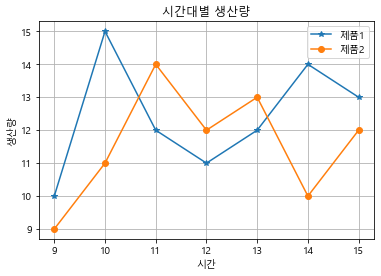

In [162]:
#그래프 생성
import matplotlib
#맑은 고딕으로 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'

# 그래프 생성
product_plot = df.plot(grid = True, style = ['-*', '-o'], title = '시간대별 생산량')
product_plot.set_ylabel('생산량')

# 이미지로 저장
image_file = 'c:/python/data/figures/fig_for_excel1.png'
plt.savefig(image_file, dpi = 400)

plt.show()


In [163]:
# (1)ExcelWriter 객체 생성
excel_file = 'c:/python/data/data_image_to_excel.xlsx'
excel_writer = pd.ExcelWriter(excel_file, engine = 'xlsxwriter')

# (2) data 할당
df.to_excel(excel_writer, index = True, sheet_name = 'sheet1')

# (3) ExcelWriter에서 워크시트 생성
worksheet = excel_writer.sheets['sheet1']

# (4) 워크시트에서 차트가 들어갈 위치를 지정해 이미지 넣기
worksheet.insert_image('D2', image_file, {'x_scale': 0.7, 'y_scale': 0.7})

# (5) 객체 닫고 엑셀 파일 출력
excel_writer.save()

#### 2) 엑셀 차트 생성